In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import house_sales_data as hsd
from sklearn.model_selection import train_test_split

In [2]:
## Sacramento house price data; load
data = hsd.house_sales_data()
print(data.keys())

## Get the target (i.e., price) and two features
price = data["price"]
beds = data["beds"]
area = data["area"]

dict_keys(['price', 'area', 'beds', 'baths', 'condo', 'location'])


In [3]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent(X, y, max_iteration, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    costs = np.zeros(max_iteration)
    alpha=learning_rate
    for i in range(max_iteration):
        grad=np.zeros(n)
        for j in range(m):
            y_hat=X[j]@theta
            costs[i]+=1/m*(y_hat-y[j])**2
            for k in range(n):
                grad[k]+=1/m*2*(y_hat-y[j])*X[j,k]
        theta -=alpha*grad
    return theta,costs

In [4]:
# Normalize data 
def normalize_data(X, y, normalize_cols):
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    return X,y,min_X, max_X, min_y, max_y

In [5]:
# Implement an evaluation metric for regression
def evaluation_metric(y,y_hat):
    return np.sqrt(np.square(np.subtract(y,y_hat).mean()))

In [6]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
X, y, min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# call gradient descent and fine-tune your learning rate
gradient_descent(X_train,y_train,500,0.01)

(array([0.20860415, 0.14874024, 0.15101251]),
 array([0.10482456, 0.1008441 , 0.0970652 , 0.09347762, 0.09007163,
        0.08683802, 0.08376801, 0.08085329, 0.07808596, 0.07545855,
        0.07296392, 0.07059534, 0.0683464 , 0.06621101, 0.06418341,
        0.06225812, 0.06042993, 0.05869392, 0.0570454 , 0.05547991,
        0.05399325, 0.05258141, 0.05124057, 0.04996714, 0.04875769,
        0.04760897, 0.04651789, 0.04548152, 0.04449709, 0.04356194,
        0.04267359, 0.04182965, 0.04102786, 0.04026608, 0.03954229,
        0.03885454, 0.03820102, 0.03757997, 0.03698975, 0.0364288 ,
        0.03589563, 0.03538882, 0.03490704, 0.03444901, 0.03401354,
        0.03359947, 0.03320571, 0.03283124, 0.03247508, 0.03213629,
        0.031814  , 0.03150736, 0.03121559, 0.03093792, 0.03067365,
        0.03042209, 0.03018259, 0.02995455, 0.02973738, 0.02953053,
        0.02933348, 0.02914573, 0.02896681, 0.02879627, 0.02863369,
        0.02847865, 0.02833079, 0.02818974, 0.02805514, 0.02792668,
  

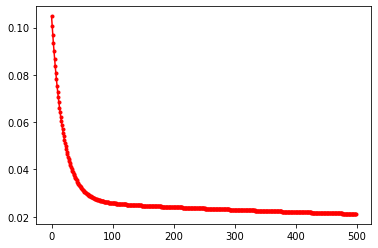

In [8]:
# plot cost vs iterations 
# note gradient descent return costs for all iterations
theta_for500,costs=gradient_descent(X_train,y_train,500,0.01)
plt.plot(costs,'r.-')

In [9]:
# print evaluation metric for test set while
# changing max_iteration from 500 to 2000

##### for 500
theta_for500,costs=gradient_descent(X_train,y_train,500,0.01)
y_test_hat500=X_test@theta_for500
print(evaluation_metric(y_test,y_test_hat500))

########## for 2000
theta_for2000,costs=gradient_descent(X_train,y_train,2000,0.01)
y_test_hat2000=X_test@theta_for2000
print(evaluation_metric(y_test,y_test_hat2000))

# Note the best value of evaluation metric you get

0.010036888206451202
0.006933272329693822


### best evaluation metric is for 2000 iterations

In [10]:
# compare your solution with scikit-learn library
from sklearn import datasets, linear_model

In [11]:
# Create linear regression object
from sklearn.linear_model import LinearRegression

In [12]:
# Train the model using the training sets
LR= LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [13]:
# Predict on test set and print evaluation metric
predicted_data=LR.predict(X_test)
predicted_data
evaluation_metric(y_test,predicted_data)

0.006546762800805023

In [14]:
# How much does it differ by from 
evaluation_metric(y_test_hat2000,predicted_data)

0.0003865095288887947